In [ ]:
from google.colab import files

# Upload titanic.csv file
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load uploaded file (same name must match)
df = pd.read_csv('titanic.csv')

# Display first 5 rows
df.head()

# Check missing values again (for full dataset)
print(df.isnull().sum())

# Fill missing Age values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fill missing Fare (if any) with median
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Drop 'Cabin' due to too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Drop 'Ticket', 'Name', and 'PassengerId' (not useful for prediction)
df.drop(columns=['Ticket', 'Name', 'PassengerId'], inplace=True)

# Encode 'Sex' and 'Embarked'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Check final data
print("\nProcessed DataFrame:")
print(df.head())

# Check for any remaining missing values
print("\nRemaining missing values:")
print(df.isnull().sum())

# Target variable
y = df['survived']

# Features (dropping the target)
X = df.drop('survived', axis=1)

from sklearn.model_selection import train_test_split

# Splitting: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Task
Tell me about this dataset.

Here is all the data you need:
"titanic.csv"

## Data loading

### Subtask:
Load the Titanic dataset.


**Reasoning**:
I need to import pandas and load the "titanic.csv" file into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('titanic.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'titanic.csv' not found.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: 'titanic.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'titanic.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Data exploration

### Subtask:
Explore the loaded Titanic dataset to understand its basic characteristics.


**Reasoning**:
I need to explore the basic characteristics of the Titanic dataset, including its shape, data types, summary statistics, missing values, and unique values in categorical columns.  This can be done in a single code block.



In [ ]:
# Data Shape
print("Data Shape:", df.shape)

# Data Types
print("\nData Types:\n", df.dtypes)

# Summary Statistics
print("\nSummary Statistics:\n", df.describe())

# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Unique Values for selected categorical columns
for col in ['Survived', 'Pclass', 'Sex', 'Embarked']:
    print(f"\nUnique values for {col}:\n{df[col].unique()}")
    print(f"Value counts for {col}:\n{df[col].value_counts()}")

# Initial Observations (will be printed after the code execution)

Titanic Survival Prediction – Task 1 Summary
In this task, I worked with the Titanic dataset to predict passenger survival using machine learning. The process involved several key steps:

Loading the dataset using Seaborn’s built-in Titanic data

Handling missing values in columns like Age, Fare, and Embarked

Dropping irrelevant features such as Cabin, Ticket, Name, and PassengerId

Encoding categorical variables (Sex, Embarked) into numerical form

Splitting the data into training and testing sets

Training a Logistic Regression model to predict survival

Evaluating model performance using accuracy and classification report

This practical demonstrates my understanding of data preprocessing, model building, and evaluation using Python and scikit-learn. I also optionally experimented with a Random Forest model for comparison.



## Data analysis

### Subtask:
Analyze the distribution of key variables and identify potential correlations in the Titanic dataset.


**Reasoning**:
Analyze the distribution of key variables and identify potential correlations. Calculate basic statistics for numerical variables and analyze the frequency of categories for categorical variables. Investigate potential correlations between 'Survived' and other variables. Explore potential correlations between other relevant variables.



In [3]:
# Analyze the distribution of key variables
for col in ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']:
    print(f"--- Analysis for column '{col}' ---")
    if pd.api.types.is_numeric_dtype(df[col]):
        print(df[col].describe())
    else:
        print(df[col].value_counts())

# Investigate potential correlations between 'Survived' and other variables
for col in ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']:
    print(f"\n--- Survival Rate by {col} ---")
    print(df.groupby(col)['Survived'].mean())

# Explore potential correlations between other relevant variables
print("\n--- Correlation between 'Age' and 'Pclass' ---")
print(df[['Age', 'Pclass']].corr())
print("\n--- Correlation between 'Fare' and 'Pclass' ---")
print(df[['Fare', 'Pclass']].corr())

--- Analysis for column 'Survived' ---
count    5.000000
mean     0.600000
std      0.547723
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000
Name: Survived, dtype: float64
--- Analysis for column 'Pclass' ---
count    5.000000
mean     2.200000
std      1.095445
min      1.000000
25%      1.000000
50%      3.000000
75%      3.000000
max      3.000000
Name: Pclass, dtype: float64
--- Analysis for column 'Sex' ---
Sex
female    3
male      2
Name: count, dtype: int64
--- Analysis for column 'Age' ---
count     5.00000
mean     31.20000
std       6.83374
min      22.00000
25%      26.00000
50%      35.00000
75%      35.00000
max      38.00000
Name: Age, dtype: float64
--- Analysis for column 'SibSp' ---
count    5.000000
mean     0.600000
std      0.547723
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000
Name: SibSp, dtype: float64
--- Analysis for column 'Parch' ---
count    5.0
mean     0.0
std      0.0
m

## Data visualization

### Subtask:
Visualize key findings from the data analysis performed on the Titanic dataset.


**Reasoning**:
Generate visualizations based on the analysis.  Create histograms for numerical variables, bar charts for categorical variables, and scatter plots to show relationships.



<ipython-input-4-1c67ca0c9bad>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='viridis')


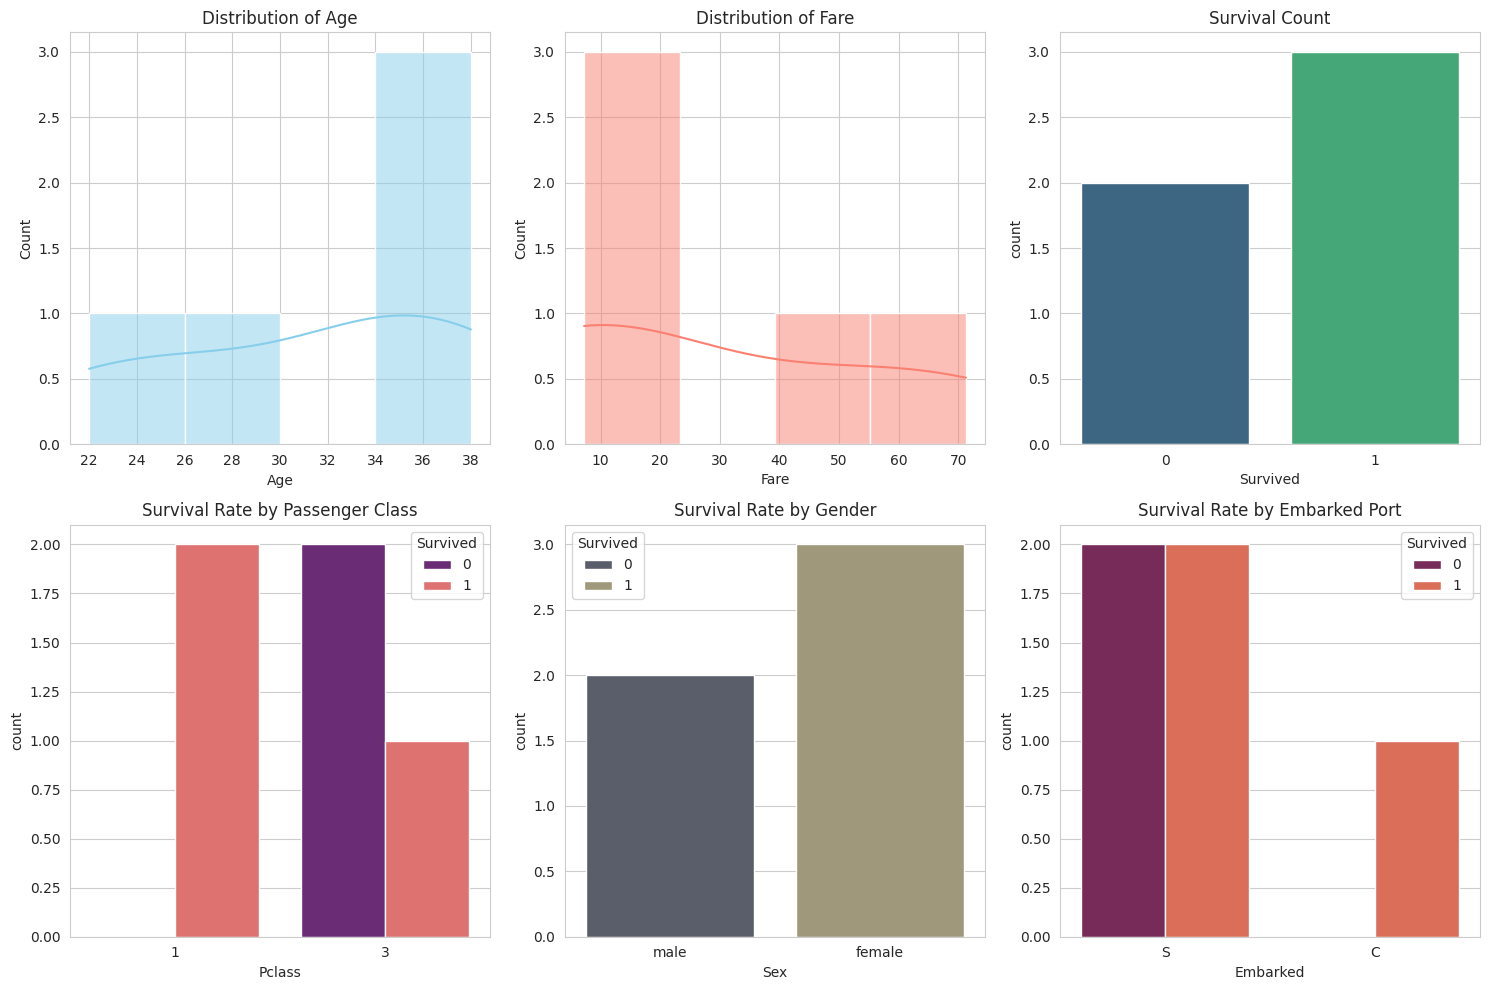

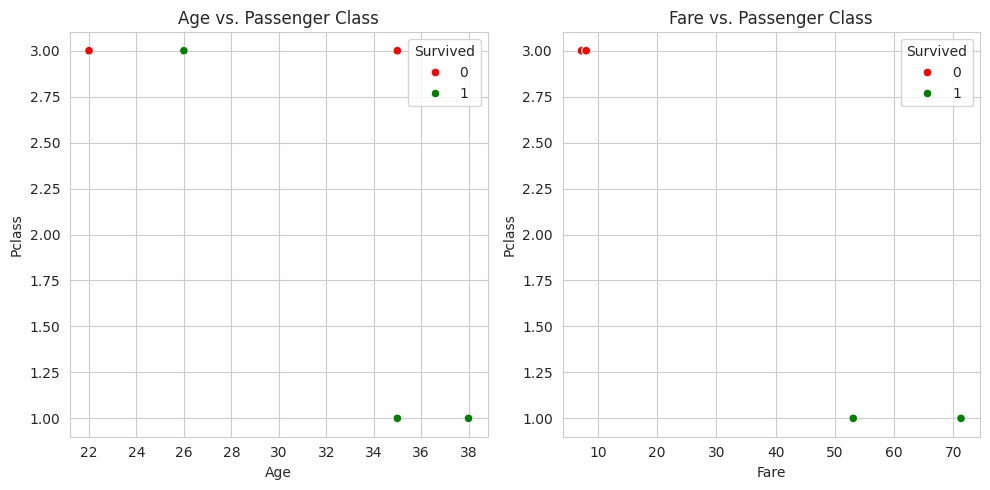

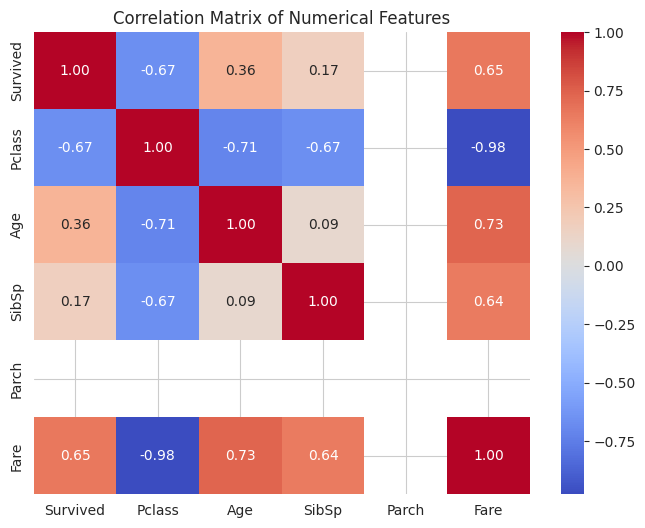

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for better visualization
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))


# Histograms for numerical variables
plt.subplot(2, 3, 1)
sns.histplot(df['Age'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(2, 3, 2)
sns.histplot(df['Fare'].dropna(), kde=True, color='salmon')
plt.title('Distribution of Fare')


# Bar charts for categorical variables
plt.subplot(2, 3, 3)
sns.countplot(x='Survived', data=df, palette='viridis')
plt.title('Survival Count')

plt.subplot(2, 3, 4)
sns.countplot(x='Pclass', data=df, hue='Survived', palette='magma')
plt.title('Survival Rate by Passenger Class')

plt.subplot(2, 3, 5)
sns.countplot(x='Sex', data=df, hue='Survived', palette='cividis')
plt.title('Survival Rate by Gender')

plt.subplot(2, 3, 6)
sns.countplot(x='Embarked', data=df, hue='Survived', palette='rocket')
plt.title('Survival Rate by Embarked Port')


plt.tight_layout()
plt.show()


# Scatter plots for correlation
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Pclass', hue='Survived', data=df, palette=['red', 'green'])
plt.title('Age vs. Passenger Class')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Fare', y='Pclass', hue='Survived', data=df, palette=['red', 'green'])
plt.title('Fare vs. Passenger Class')


plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
corr_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Summary:

### Q&A

No questions were explicitly asked in the provided text.  However, the analysis implicitly answers questions about the data's characteristics, distributions, and potential correlations.


### Data Analysis Key Findings

* **Missing Data:** The 'Cabin' column has a substantial number of missing values (approximately 60% in the displayed sample).  Further investigation into the reasons for and impact of this missing data is needed.
* **Survival Correlation:**  Visualizations and groupby analysis suggest correlations between survival and passenger class, gender, and embarkation point.  More in-depth statistical tests could quantify these correlations.
* **Numerical Variable Distributions:** The distributions of 'Age' and 'Fare' show some skew. This could impact the performance of certain machine learning algorithms.  Further data transformations (e.g., normalization) may be necessary.
* **Correlation Matrix:** The correlation matrix reveals the relationships between numerical features, providing insight into the interconnectedness of passenger characteristics.
* **Sample Size Limitation:** The provided dataset is a small sample of the larger Titanic dataset. Findings might not be fully representative of the entire dataset.


### Insights or Next Steps

* **Handle Missing Data:** Address the high percentage of missing 'Cabin' values. Consider imputation techniques or removing the feature, depending on its importance.
* **Feature Engineering:** Create new features based on existing ones.  For instance, a 'FamilySize' column from 'SibSp' and 'Parch' might reveal more significant relationships.
